<a href="https://colab.research.google.com/github/SourabhThanvi/Pw_Skills_Sourabh/blob/main/Bike_Detail_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/BIKE DETAILS.csv')

In [ ]:
df.sample(5)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
780,TVS Victor GLX,27000,2002,Individual,1st owner,49000,NaN
104,Royal Enfield Classic Desert Storm,150000,2017,Individual,1st owner,16500,181445.0
244,Hero Maestro Edge,40000,2017,Individual,1st owner,15000,55980.0
825,Royal Enfield Thunderbird 350,100000,2012,Individual,1st owner,28000,NaN
511,Hero Splendor Plus,12000,2007,Individual,1st owner,100000,NaN


In [ ]:
df_bike = df.copy()

In [ ]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [ ]:
df_bike.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


## 1. What is the range of selling prices in the dataset?

<Axes: xlabel='selling_price', ylabel='Count'>

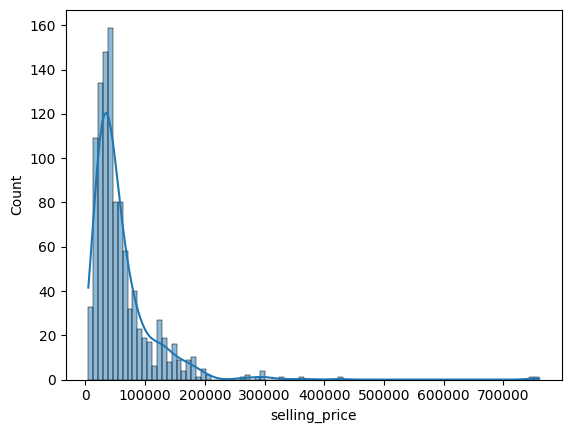

In [ ]:
sns.histplot(df_bike['selling_price'], kde=True)

In [ ]:
# range of column = max-min

selling_range = df_bike['selling_price'].max() - df_bike['selling_price'].min()
print(f'Rupees: {selling_range}')

Rupees: 755000


## 2. What is the median selling price for bikes in the dataset?

In [ ]:
df_bike['selling_price'].median()

45000.0

## 3. What is the most common seller type?

In [ ]:
df_bike['seller_type'].value_counts()

# Individual are most common seller type

,count
seller_type,
Individual,1055
Dealer,6


##  4. How many bikes have driven more than 50,000 kilometers?

In [ ]:
df_bike.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
df_bike[df_bike['km_driven'] > 50000].shape[0]

# There are 170 bikes which have driven more then 50000 km

170

## 5. What is the average km_driven value for each ownership type?

In [ ]:
df_bike.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
owner_km_avg = df_bike.groupby('owner')['km_driven'].mean()
owner_km_median = df_bike.groupby('owner')['km_driven'].median()

In [ ]:
print(owner_km_avg,'\n')
print(owner_km_median)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64 

owner
1st owner    24000.0
2nd owner    34000.0
3rd owner    35000.0
4th owner    48000.0
Name: km_driven, dtype: float64


## 6. What proportion of bikes are from the year 2015 or older?

In [ ]:
df_bike.shape[0]

1061

In [ ]:
# So, we have 1061 total bikes data.
# number of bikes from the year 2015 or older

df_bike[df_bike['year'] <= 2015].shape[0]

601

In [ ]:
# 601 bikes are from the year 2015 or older
# so proportion of bikes would be

round(df_bike[df_bike['year'] <= 2015].shape[0] / df_bike.shape[0], 4)*100

# so almost 56% of the data are of 2015 or older bikes

56.64

## 7. What is the trend of missing values across the dataset?

In [ ]:
df_bike.isna().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
# ex_showroom_price has missing values

round(df['ex_showroom_price'].isna().sum()/df['ex_showroom_price'].shape[0], 4)*100

# so we have around 40% of data missing in ex_showrom_price column. so we have to drop the column, but this column will be very helpul while prediction for reselling price

41.0

In [ ]:
df_bike.corr(numeric_only=True)['ex_showroom_price'].sort_values(ascending=False)


,ex_showroom_price
ex_showroom_price,1.000000
selling_price,0.918583
year,0.126378
km_driven,-0.122011


## 8. What is the highest ex_showroom_price recorded, and for which bike?

In [ ]:
df_bike[df_bike['ex_showroom_price'] == df_bike['ex_showroom_price'].max()]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


## 9. What is the total number of bikes listed by each seller type?

In [ ]:
df_bike.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
# method-1
df_bike.groupby('seller_type')['name'].count()

,name
seller_type,
Dealer,6
Individual,1055


In [ ]:
# method-2
df_bike['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


## 10. What is the relationship between selling_price and km_driven for first-owner bikes?

In [ ]:
first_owner_df = df_bike[df_bike['owner']=='1st owner']

<Figure size 1700x1500 with 0 Axes>

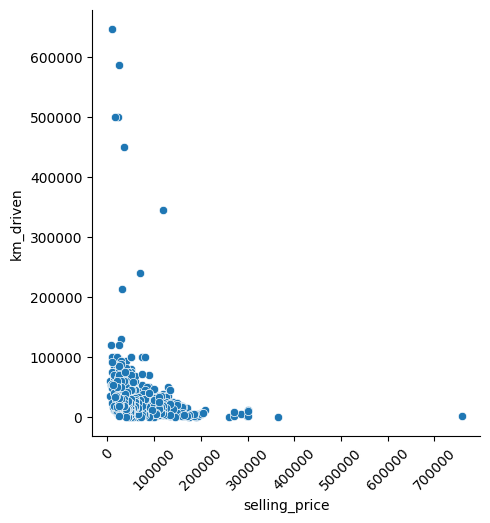

In [ ]:
plt.figure(figsize=(17, 15))
sns.relplot(x='selling_price', y='km_driven', data=first_owner_df, kind='scatter')
plt.xticks(rotation=45)
plt.show()

In [ ]:
np.corrcoef(first_owner_df['selling_price'], first_owner_df['km_driven'])

array([[ 1.        , -0.24348175],
       [-0.24348175,  1.        ]])

<Axes: >

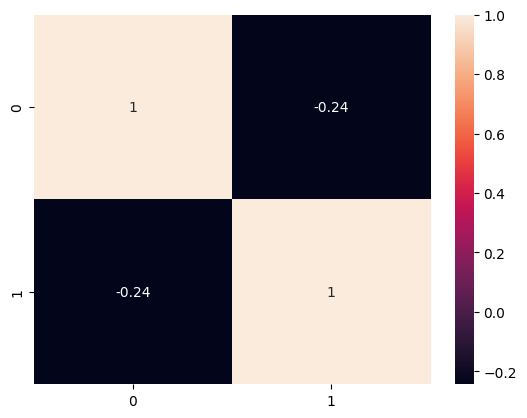

In [ ]:
sns.heatmap(np.corrcoef(first_owner_df['selling_price'], first_owner_df['km_driven']), annot=True)

In [ ]:
# -0.24 corr, So there is no linear relationship between these two columns.
# selling price is low, if the bike has more km_driven

## 11. Identify and remove outliers in the km_driven column using the IQR method?

In [ ]:
px.box(df['km_driven'])

In [ ]:
q3 = 43000 # taken from box plot
q1 = 13500 # taken from box plot

IQR = q3-q1
upper_fence = q3+(1.5*IQR)
lower_fence = q1-(1.5*IQR)

In [ ]:
print(upper_fence)
print(lower_fence)

87250.0
-30750.0


In [ ]:
df_bike = df_bike[(df_bike['km_driven'] >= lower_fence) & (df_bike['km_driven'] <= upper_fence)]

## 12. Perform a bivariate analysis to visualize the relationship between year and selling_price?

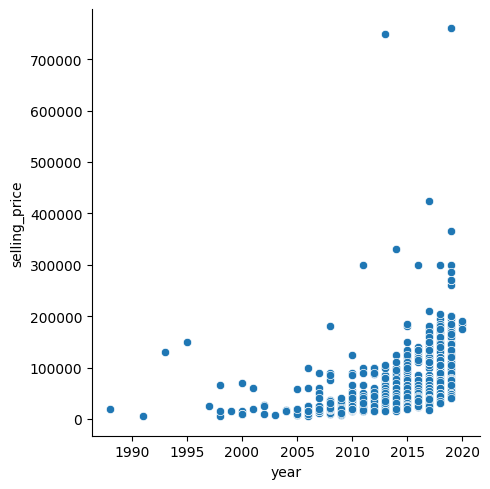

In [ ]:
sns.relplot(x=df_bike['year'], y=df_bike['selling_price'], kind='scatter')
# not a proper linear relationship, but we can see that selling price inc when year inc

<Axes: >

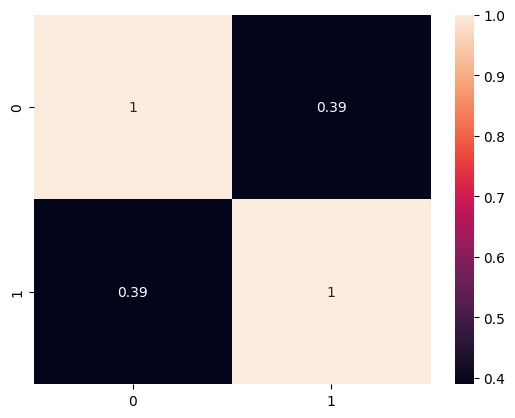

In [ ]:
sns.heatmap(np.corrcoef(df_bike['year'], df_bike['selling_price']), annot=True)

## 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [ ]:
df_bike.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
df_bike.groupby('year')['selling_price'].mean()

,selling_price
year,
1988,20000.000000
1991,6000.000000
1993,130000.000000
1995,150000.000000
1997,25000.000000
1998,28333.333333
1999,15000.000000
2000,20833.333333
2001,40000.000000


## 14. Which bike names are priced significantly above the average price for their manufacturing year?

In [ ]:
avg_price = df_bike.groupby('year')['selling_price'].mean().reset_index()
avg_price.rename(columns={'selling_price':'avg_selling_price'}, inplace=True)

In [ ]:
df_bike = pd.merge(df_bike, avg_price, on='year')

df_bike[df_bike['selling_price']>df_bike['avg_selling_price']]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,avg_selling_price_x,avg_selling_price_y,avg_selling_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,119689.511628,119689.511628,119689.511628
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,87660.374046,87660.374046,87660.374046
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,56313.131313,56313.131313,56313.131313
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN,36404.000000,36404.000000,36404.000000
13,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0,119689.511628,119689.511628,119689.511628
...,...,...,...,...,...,...,...,...,...,...
968,Bajaj Pulsar NS 200,60000,2016,Individual,1st owner,25000,99000.0,57924.126214,57924.126214,57924.126214
969,TVS Apache RTR 160,60000,2014,Individual,1st owner,19000,81000.0,49121.348315,49121.348315,49121.348315
972,Bajaj Pulsar 220 F,52000,2012,Individual,1st owner,45000,94000.0,36157.560606,36157.560606,36157.560606
976,Bajaj Pulsar NS 200,50000,2014,Individual,1st owner,13000,99000.0,49121.348315,49121.348315,49121.348315


## 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

In [ ]:
df_bike.drop(['avg_selling_price_x', 'avg_selling_price_y'], inplace=True, axis=1)

<Axes: >

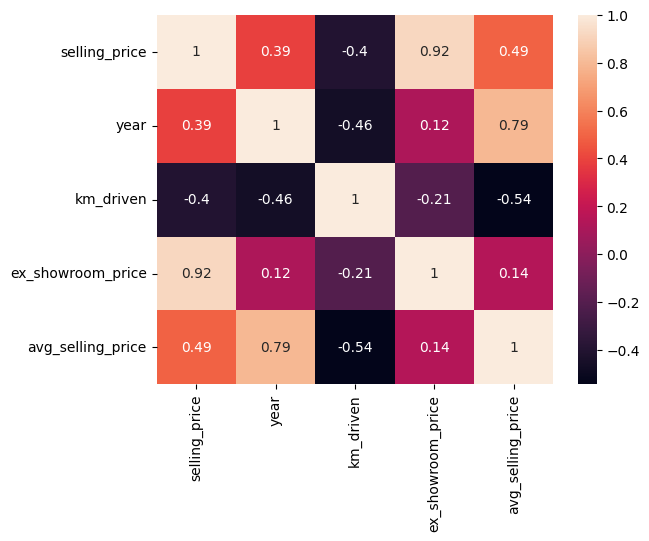

In [ ]:
sns.heatmap(df_bike.corr(numeric_only=True), annot=True)